In [1]:
!pip install rasterio

     |████████████████████████████████| 19.1MB 1.6MB/s 


In [2]:
import rasterio
from matplotlib import pyplot as plt

EPSG:32620
PROJCS["WGS 84 / UTM zone 20N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-63],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32620"]]
| 30.00, 0.00, 166185.00|
| 0.00,-30.00, 5063415.00|
| 0.00, 0.00, 1.00|


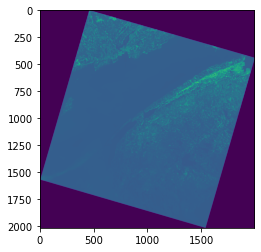

In [3]:
url = r'https://s3-us-west-2.amazonaws.com/landsat-pds/c1/L8/009/029/LC08_L1TP_009029_20210111_20210111_01_RT/LC08_L1TP_009029_20210111_20210111_01_RT_B2.TIF'
src = rasterio.open(url)
print(src.crs)
print(src.crs.wkt)
print(src.transform)
plt.imshow(src.read(1)[::4,::4],vmin=-10)
plt.show()

In [4]:
import numpy as np
import rasterio
from rasterio.warp import calculate_default_transform, reproject, Resampling

# dst_crs = 'EPSG:4326'
dst_crs = 'EPSG:3857' # web mercator 

with rasterio.open(url) as src:
  transform, width, height = calculate_default_transform(
      src.crs, dst_crs, src.width, src.height, *src.bounds)
  kwargs = src.meta.copy()
  kwargs.update({
      'crs': dst_crs,
      'transform': transform,
      'width': width,
      'height': height
  })

  with rasterio.open('testLandsat.tif', 'w', **kwargs) as dst:
      for i in range(1, src.count + 1):
          reproject(
              source=rasterio.band(src, i),
              destination=rasterio.band(dst, i),
              src_transform=src.transform,
              src_crs=src.crs,
              dst_transform=transform,
              dst_crs=dst_crs,
              resampling=Resampling.nearest)

EPSG:3857
PROJCS["WGS 84 / Pseudo-Mercator",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Mercator_1SP"],PARAMETER["central_meridian",0],PARAMETER["scale_factor",1],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],EXTENSION["PROJ4","+proj=merc +a=6378137 +b=6378137 +lat_ts=0 +lon_0=0 +x_0=0 +y_0=0 +k=1 +units=m +nadgrids=@null +wktext +no_defs"],AUTHORITY["EPSG","3857"]]
| 42.13, 0.00,-7489992.35|
| 0.00,-42.13, 5735230.01|
| 0.00, 0.00, 1.00|


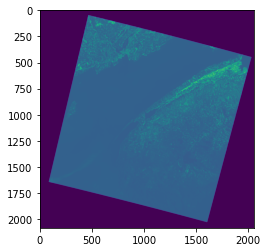

In [5]:
src = rasterio.open('testLandsat.tif')
print(src.crs)
print(src.crs.wkt)
print(src.transform)
plt.imshow(src.read(1)[::4,::4],vmin=-10)
plt.show()

#the below landsat image has been reprojected to web mercator!

In [6]:
pip install -U rio-tiler

     |████████████████████████████████| 133kB 5.0MB/s 
     |████████████████████████████████| 133kB 8.5MB/s 
     |████████████████████████████████| 10.1MB 7.4MB/s 
     |████████████████████████████████| 143kB 39.2MB/s 
     |████████████████████████████████| 204kB 40.9MB/s 
     |████████████████████████████████| 81kB 6.8MB/s 
     |████████████████████████████████| 7.4MB 40.0MB/s 
  Created wheel for rio-tiler: filename=rio_tiler-2.0.7-cp37-none-any.whl size=193655 sha256=5f45c8f18427442cd3b5c043d149e26b6b377b98b6f8b9c984a6ccabad0da29b
  Stored in directory: /root/.cache/pip/wheels/44/9b/b9/91ce77f88e5dc4b3beed0107d37c7c1783dd23c8c9c7919c09
  Created wheel for morecantile: filename=morecantile-2.1.0-cp37-none-any.whl size=27133 sha256=02c58248c51919ae0de516c8e86e5ae43d3aa7344bad99988829476216d50341
  Stored in directory: /root/.cache/pip/wheels/f4/bc/4e/f0038e6ca3ad4535d5bfc8df03f1dc5f4bae8c04047e7c6cf0
Successfully built rio-tiler morecantile
ERROR: botocore 1.20.45 has requiremen

In [7]:
from rio_tiler.io import COGReader

with COGReader("testLandsat.tif") as image:
    # img = image.tile(0, 0, 0)   
    img = image.tile(326, 368, 10)         # read mercator tile z-x-y
    # img = image.part(bbox)               # read the data intersecting a bounding box
    # img = image.feature(geojson_feature) # read the data intersecting a geojson feature
    # img = image.point(lon,lat) 

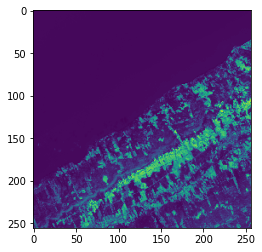

In [ ]:
plt.imshow(img.data[0,:,:])
plt.show()

# the below is a landsat image in web mercator snapped to a slippy tile!

### The following are notes and chaos

In [8]:
!pip install pyproj

     |████████████████████████████████| 6.5MB 6.1MB/s 


In [ ]:
from pyproj import Transformer
dst_crs = 'EPSG:3857' # web mercator 
from_crs = 'EPSG:4326' # wgs84
from_crs = 'EPSG:32620 #WGS 84 / UTM zone 20N
transformer = Transformer.from_crs(from_crs, dst_crs, always_xy=True)
transformer.transform(-80, 50)
# (571666.4475041276, 5539109.815175673)

(-8905559.263461886, 6446275.841017158)

In [ ]:
src.bounds

BoundingBox(left=-7489992.3529268205, bottom=5384190.036966825, right=-7144428.8216582555, top=5735230.010886239)

In [ ]:
src.crs

CRS.from_epsg(3857)

In [ ]:
import math
def tile_from_coords(lat, lon, zoom):
    lat_rad = math.radians(lat)
    n = 2.0 ** zoom
    tile_x = int((lon + 180.0) / 360.0 * n)
    tile_y = int((1.0 - math.asinh(math.tan(lat_rad)) / math.pi) / 2.0 * n)
    return [tile_x, tile_y, zoom]

In [ ]:
tile_from_coords(44.88,-65.16,10)

[326, 368, 10]

EPSG:32620
PROJCS["WGS 84 / UTM zone 20N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-63],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32620"]]
| 30.00, 0.00, 166185.00|
| 0.00,-30.00, 5063415.00|
| 0.00, 0.00, 1.00|


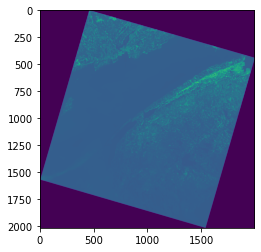

In [ ]:
src2 = rasterio.open(url)
print(src2.crs)
print(src2.crs.wkt)
print(src2.transform)
plt.imshow(src2.read(1)[::4,::4],vmin=-10)
plt.show()

In [ ]:
img2 = src2.read(1)

In [ ]:
img2.shape

(8061, 7951)

In [ ]:
len(img2.shape)

2

In [ ]:
def image_from_features(features, width):
    length,depth = features.shape
    height = int(length/width)
    img = features.reshape(width,height,depth)
    return img

In [ ]:
def features_from_image(img):
    if len(img.shape)==2:
      features = img.flatten()
    else:
      features = img.reshape(-1, img.shape[2])
    return features

In [ ]:
feat2 = features_from_image(img2)

In [ ]:
xImg = np.zeros(img2.shape)
yImg = np.zeros(img2.shape)

In [ ]:
src2.bounds.left

166185.0

In [ ]:
xvals = np.linspace(start=src2.bounds.left, stop=src2.bounds.right, num=img2.shape[1], endpoint=True, retstep=False, dtype=None, axis=0)
yvals = np.linspace(start=src2.bounds.bottom, stop=src2.bounds.top, num=img2.shape[0], endpoint=True, retstep=False, dtype=None, axis=0)

In [ ]:
xygrid = np.meshgrid(xvals, yvals)

In [ ]:
scale = lambda x: src2.bounds.left+x*3 

In [ ]:
scale(xImg)

array([[166185., 166185., 166185., ..., 166185., 166185., 166185.],
       [166185., 166185., 166185., ..., 166185., 166185., 166185.],
       [166185., 166185., 166185., ..., 166185., 166185., 166185.],
       ...,
       [166185., 166185., 166185., ..., 166185., 166185., 166185.],
       [166185., 166185., 166185., ..., 166185., 166185., 166185.],
       [166185., 166185., 166185., ..., 166185., 166185., 166185.]])

In [ ]:
xImg2 = np.tile(xvals,(img2.shape))

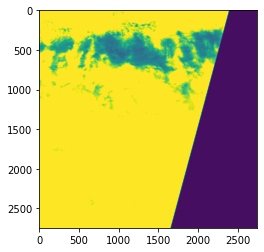

In [ ]:
# https://trac.osgeo.org/gdal/wiki/CloudOptimizedGeoTIFF
cogurl = r'http://even.rouault.free.fr/gtiff_test/S2A_MSIL1C_20170102T111442_N0204_R137_T30TXT_20170102T111441_TCI_cloudoptimized_2.tif'
src3 = rasterio.open(cogurl)
plt.imshow(src3.read(1)[::4,::4],vmin=-10)
plt.show()